In [21]:
import torch
import torchvision
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import functional as F

In [22]:
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval() 

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [23]:
image_path = "img2.jpg"

In [24]:
image = cv2.imread(image_path) 

In [25]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [26]:
image_tensor = F.to_tensor(image)
image_tensor = image_tensor.unsqueeze(0)  # Add batch dimension

In [27]:
# Get predictions from the model
with torch.no_grad():
    predictions = model(image_tensor)

In [28]:
# Extract scores, masks, and bounding boxes from predictions
scores = predictions[0]['scores'].numpy()
masks = predictions[0]['masks'].detach().cpu().numpy()
boxes = predictions[0]['boxes'].detach().cpu().numpy()

In [30]:
# Apply threshold to filter predictions
threshold = 0.5 
indices = scores > threshold

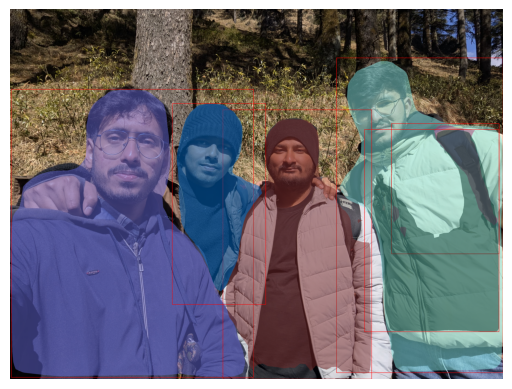

In [31]:
for i in range(len(indices)):
    if indices[i]: 
        mask = masks[i, 0]  # Extract the mask
        mask = (mask > 0.5).astype(np.uint8) * 255
        color = np.random.randint(0, 255, (3,))  # Random color
        image[mask > 0] = image[mask > 0] * 0.5 + color * 0.5 

        # Draw bounding box
        x1, y1, x2, y2 = map(int, boxes[i])
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2) 

# Display the segmented image
plt.imshow(image)
plt.axis("off")
plt.show()